## TASK 1 : "MOVIE RECOMMENDATIONS SYSTEM"

CODING RAJA TECHNOLOGIES




NAME: ANNAPOORNIMA

DATA SCIENCE

1. Data Collection: Gather movie ratings data from users, including movie IDs, user IDs, and ratings &  2.Data Preprocessing

In [23]:
pip install scikit-surprise

In [6]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [7]:
data = pd.read_csv('movies.csv')

In [8]:
data.head()

,movieId,title,genres,Ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1


3.User-Item Matrix: Create a user-item matrix where rows represent users, columns represent movies, and entries
represent ratings.


In [9]:
user_item_matrix = data.pivot_table(index='movieId', columns='title', values='Ratings').fillna(0)


4. Collaborative Filtering: Implement collaborative filtering algorithms like User-Based or Item-Based methods.

In [10]:
# Step 4: Implement Collaborative Filtering Algorithms
reader = Reader(rating_scale=(0, 5))
data_surprise = Dataset.load_from_df(data[['movieId', 'title', 'Ratings']], reader)
trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)

algo = SVD()
algo.fit(trainset)



5. Model Evaluation: Split the dataset into training and testing sets to evaluate the recommendation system's accuracy.

In [11]:
# Step 5: Model Evaluation
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 1.0743


1.074297970412412

6. Top-N Recommendations: Generate top-N movie recommendations for a specific user.


In [16]:
def get_top_n_recommendations(user_id, n=5):
    list_of_movies = data['movieId'].unique()  # Corrected column name
    user_unrated_movies = [movie for movie in list_of_movies if movie not in user_item_matrix.loc[user_id].dropna().index]
    predictions = [algo.predict(user_id, movie) for movie in user_unrated_movies]
    top_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    top_movie_ids = [pred.iid for pred in top_predictions]
    top_movie_titles = [data.loc[data['movieId'] == movie, 'title'].values[0] for movie in top_movie_ids]  # Corrected column name
    return top_movie_titles

In [19]:
# Display the top-N movie recommendations based on ratings
n = 5  # Define the value of 'n' here
top_n_movies = data.nlargest(n, 'Ratings')
print(f"Top {n} Movie Recommendations based on Ratings:")
print(top_n_movies[['title', 'Ratings']])



Top 5 Movie Recommendations based on Ratings:
                       title  Ratings
3   Waiting to Exhale (1995)        3
8        Sudden Death (1995)        3
12              Balto (1995)        3
17         Four Rooms (1995)        3
21            Copycat (1995)        3


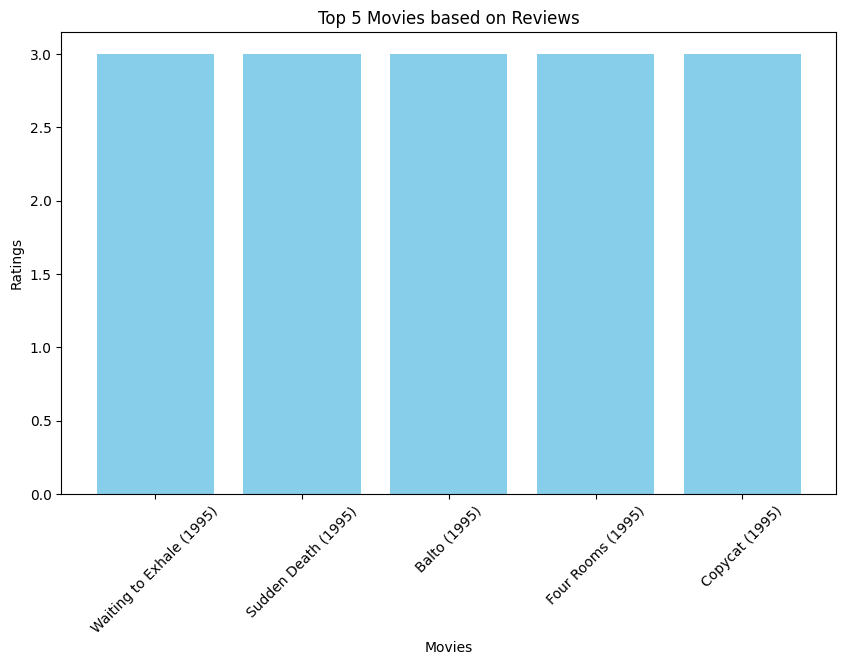

In [20]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the 'Ratings' column
top_movies = data.nlargest(5, 'Ratings')

# Creating a bar chart for the top 5 movies based on reviews
plt.figure(figsize=(10, 6))
plt.bar(top_movies['title'], top_movies['Ratings'], color='skyblue')
plt.xlabel('Movies')
plt.ylabel('Ratings')
plt.title('Top 5 Movies based on Reviews')
plt.xticks(rotation=45)
plt.show()
